In [27]:
import numpy as np
import matplotlib.pyplot as plt

# AVX

In [28]:
# Temps d'exécution pour le code séquentiel
sequential_times = np.array([62.4995, 62.2118, 63.5485, 64.9864, 62.9943])

# Temps d'exécution moyen pour le code parallèle (OpenMP)
parallel_times = np.array([
    [32.9002, 35.7219, 34.404, 33.1014, 34.6126],
    [20.3918, 21.8899, 21.6995, 22.6358, 23.7724],
    [15.459, 16.2498, 17.1141, 16.0934, 18.2172],
    [14.3863, 15.3484, 15.9003, 16.2019, 15.6944],
    [13.7767, 14.387, 14.9427, 14.9073, 14.5856],
    [12.4337, 13.3921, 13.8478, 13.705, 14.174]
])

# Temps d'exécution moyen pour le code AVX (AVX Vectorisation)
avx_times = np.array([
    [18.0798, 18.6566, 18.1918, 18.6221, 18.3836],
    [12.7193, 12.8613, 12.8465, 12.6606, 13.0728],
    [9.71191, 10.4119, 10.9874, 10.0714, 10.3927],
    [9.17135, 9.37708, 9.15356, 9.33972, 9.14766],
    [8.08973, 8.67465, 8.65504, 8.97191, 8.25383],
    [7.46966, 7.40905, 7.56359, 8.72733, 8.23306]
])

# Calculer les moyennes pour chaque configuration
avg_sequential = np.mean(sequential_times)
avg_parallel = np.mean(parallel_times, axis=1)
avg_avx = np.mean(avx_times, axis=1)

# Calculer les accélérations
speedup_parallel = avg_sequential / avg_parallel
speedup_avx = avg_sequential / avg_avx

# Configuration des threads
threads = np.array([2, 4, 6, 8, 10, 12])

# Calculer les efficacités pour chaque configuration
efficiency_parallel = speedup_parallel / threads
efficiency_avx = speedup_avx / threads

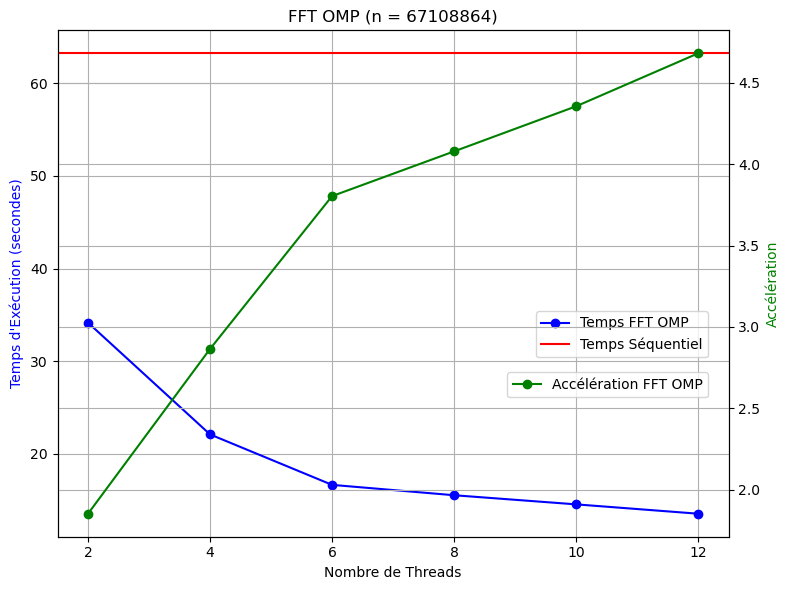

In [29]:
# Création du graphique avec 3 subplots pour FFT OMP, FFT OMP + Vectorisation, et FFT NEON/AVX Vectorisation
plt.figure(figsize=(8, 6))

# FFT OMP
plt.subplot(1, 1, 1)
plt.grid(True)
plt.plot(threads, avg_parallel, label="Temps FFT OMP", marker='o', color='blue')
plt.axhline(y=avg_sequential, color='r', linestyle='-', label="Temps Séquentiel")
plt.xlabel("Nombre de Threads")
plt.ylabel("Temps d'Exécution (secondes)", color='blue')
plt.title("FFT OMP (n = 67108864)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.twinx()
plt.plot(threads, speedup_parallel, label="Accélération FFT OMP", marker='o', color='green')  # Changer la couleur à lightblue
plt.ylabel("Accélération", color='green')  # Changer la couleur à lightblue
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.3))  # Ajuster les coordonnées de la légende
plt.grid(True)

plt.tight_layout()
plt.show()


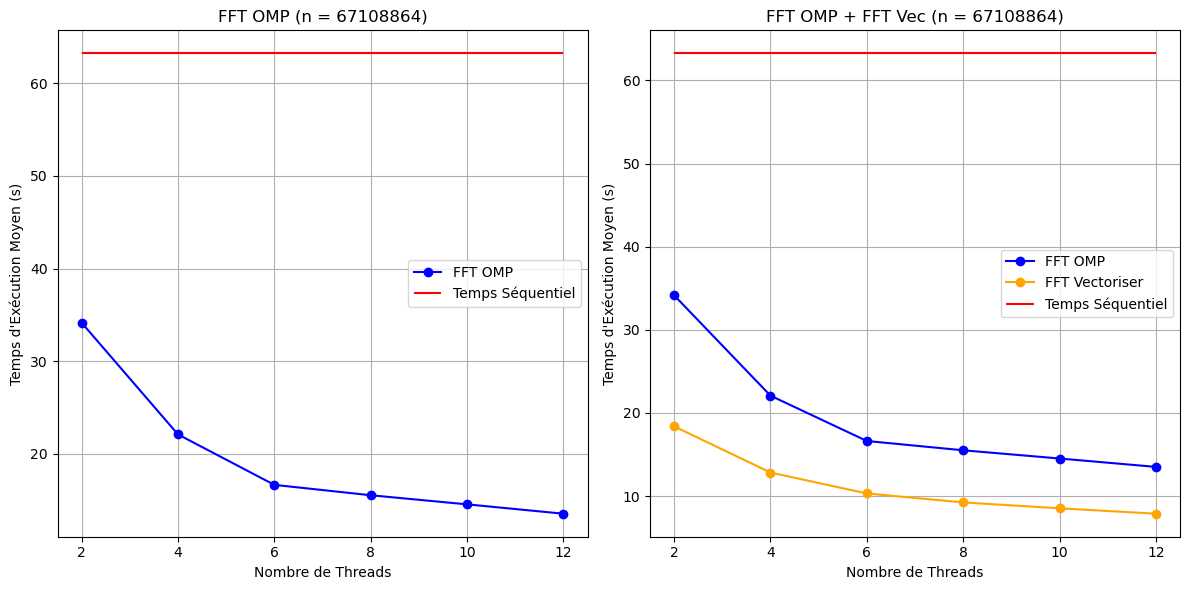

In [30]:
# Création des graphiques
plt.figure(figsize=(12, 6))

# FFT OMP
plt.subplot(1, 2, 1)
plt.plot(threads, avg_parallel, marker='o', color='blue', linestyle='-', label='FFT OMP')
plt.hlines(avg_sequential, threads[0], threads[-1], colors='red', linestyles='-', label='Temps Séquentiel')
plt.title('FFT OMP (n = 67108864)')
plt.xlabel('Nombre de Threads')
plt.ylabel('Temps d\'Exécution Moyen (s)')
plt.legend(loc='center right')
plt.grid(True)


# FFT NEON/AVX Vectorisation
plt.subplot(1, 2, 2)
plt.plot(threads, avg_parallel, marker='o', color='blue', linestyle='-', label='FFT OMP')
plt.plot(threads, avg_avx, marker='o', color='orange', linestyle='-', label='FFT Vectoriser')
plt.hlines(avg_sequential, threads[0], threads[-1], colors='red', linestyles='-', label='Temps Séquentiel')
plt.title('FFT OMP + FFT Vec (n = 67108864)')
plt.xlabel('Nombre de Threads')
plt.ylabel('Temps d\'Exécution Moyen (s)')
plt.legend(loc='center right')
plt.grid(True)

plt.tight_layout()
plt.show()

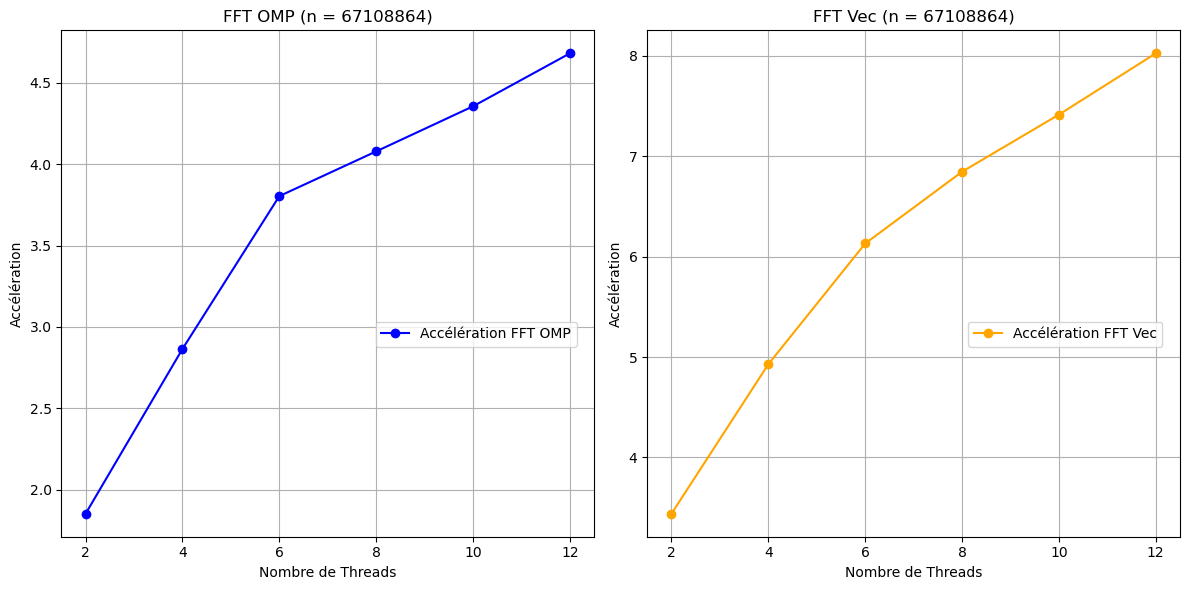

In [31]:
# Création du graphique avec 3 subplots pour FFT OMP, FFT OMP + Vectorisation, et FFT NEON/AVX Vectorisation
plt.figure(figsize=(12, 6))

# FFT OMP
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(threads, speedup_parallel, label="Accélération FFT OMP", marker='o', color='blue')
plt.xlabel("Nombre de Threads")
plt.ylabel("Accélération")
plt.title("FFT OMP (n = 67108864)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.grid(True)


# FFT NEON/AVX Vectorisation
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(threads, speedup_avx, label="Accélération FFT Vec", marker='o', color='orange')
plt.xlabel("Nombre de Threads")
plt.ylabel("Accélération")
plt.title("FFT Vec (n = 67108864)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.grid(True)

plt.tight_layout()
plt.show()


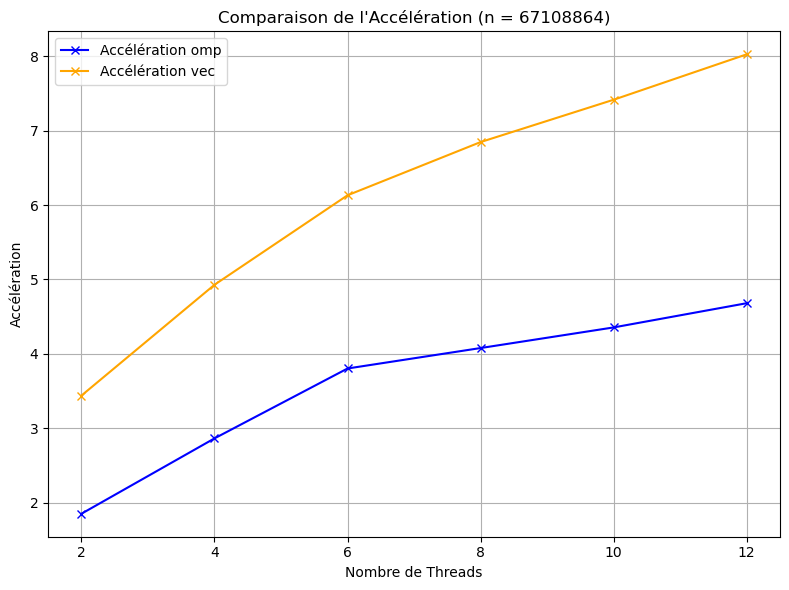

In [32]:
# Création des graphiques
plt.figure(figsize=(8, 6))

# Comparaison de l'accélération
plt.subplot(1, 1, 1)
plt.plot(threads, speedup_parallel, marker='x', color='blue', linestyle='-', label='Accélération omp')
plt.plot(threads, speedup_avx, marker='x', color='orange', linestyle='-', label='Accélération vec')
plt.title('Comparaison de l\'Accélération (n = 67108864)')
plt.xlabel('Nombre de Threads')
plt.ylabel('Accélération')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

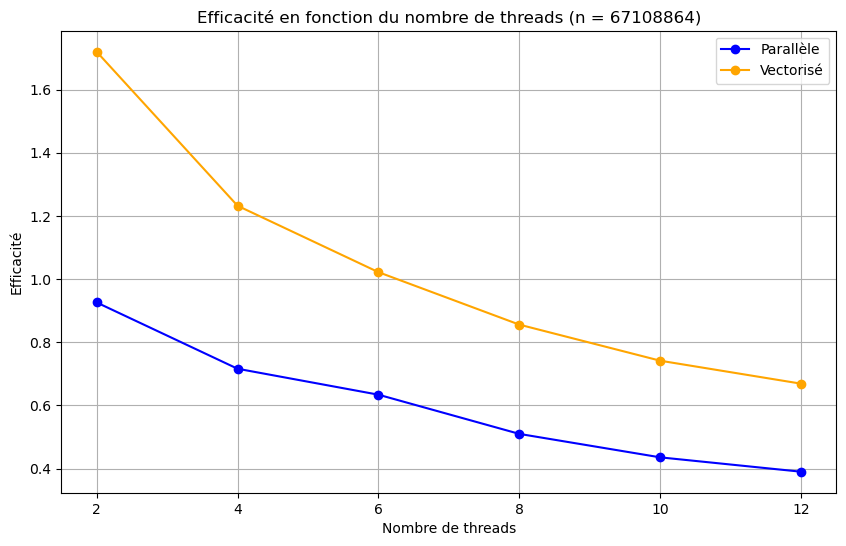

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Temps d'exécution pour le code séquentiel
sequential_times = np.array([62.4995, 62.2118, 63.5485, 64.9864, 62.9943])

# Temps d'exécution moyen pour le code parallèle (OpenMP)
parallel_times = np.array([
    [32.9002, 35.7219, 34.404, 33.1014, 34.6126],
    [20.3918, 21.8899, 21.6995, 22.6358, 23.7724],
    [15.459, 16.2498, 17.1141, 16.0934, 18.2172],
    [14.3863, 15.3484, 15.9003, 16.2019, 15.6944],
    [13.7767, 14.387, 14.9427, 14.9073, 14.5856],
    [12.4337, 13.3921, 13.8478, 13.705, 14.174]
])

# Temps d'exécution moyen pour le code vectoriel (OpenMP + Vectorisation)
vectorized_times = np.array([
    [18.0798, 18.6566, 18.1918, 18.6221, 18.3836],
    [12.7193, 12.8613, 12.8465, 12.6606, 13.0728],
    [9.71191, 10.4119, 10.9874, 10.0714, 10.3927],
    [9.17135, 9.37708, 9.15356, 9.33972, 9.14766],
    [8.08973, 8.67465, 8.65504, 8.97191, 8.25383],
    [7.46966, 7.40905, 7.56359, 8.72733, 8.23306]
])

# Calculer les moyennes pour chaque configuration
avg_sequential = np.mean(sequential_times)
avg_parallel = np.mean(parallel_times, axis=1)
avg_vectorized = np.mean(vectorized_times, axis=1)

# Calculer les accélérations
speedup_parallel = avg_sequential / avg_parallel
speedup_vectorized = avg_sequential / avg_vectorized

# Configuration des threads
threads = np.array([2, 4, 6, 8, 10, 12])

# Calculer les efficacités pour chaque configuration
efficiency_parallel = speedup_parallel / threads
efficiency_vectorized = speedup_vectorized / threads

# Tracer les graphiques
plt.figure(figsize=(10, 6))

# Efficacité pour le code parallèle
plt.plot(threads, efficiency_parallel, color="blue", marker='o', label='Parallèle')
# Efficacité pour le code vectoriel
plt.plot(threads, efficiency_vectorized, color="orange", marker='o', label='Vectorisé')

plt.title('Efficacité en fonction du nombre de threads (n = 67108864)')
plt.xlabel('Nombre de threads')
plt.ylabel('Efficacité')
plt.legend()
plt.grid(True)
plt.show()


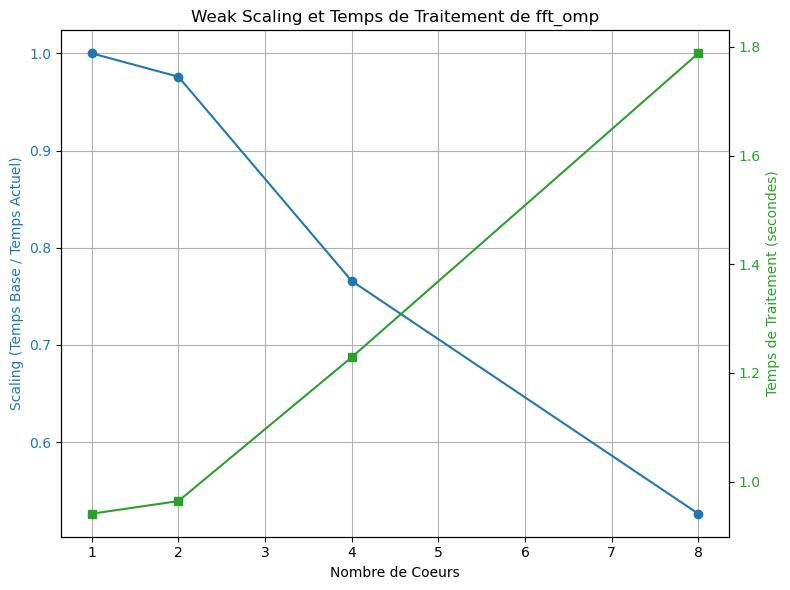

In [34]:
import matplotlib.pyplot as plt
# Weak scaling du fft_omp SUR PC

# Exemple de données pour le weak scaling
tailles_taches = [1048576, 2097152, 4194304, 8388608]  # Taille de la tâche
nombre_coeurs = [1, 2, 4, 8]  # Nombre de coeurs utilisés
temps_traitement = [0.940899, 0.964082,1.22872,1.78798]  # Temps de traitement en secondes

# Calcul de l'efficacité du scaling
efficacite_scaling = [temps_traitement[0] / t for t in temps_traitement]

fig, ax1 = plt.subplots(figsize=(8, 6))

# Configuration de l'axe pour l'efficacité du scaling
color = 'tab:blue'
ax1.set_xlabel('Nombre de Coeurs')
ax1.set_ylabel('Scaling (Temps Base / Temps Actuel)', color=color)
ax1.plot(nombre_coeurs, efficacite_scaling, 'o-', color=color, label='Efficacité du Weak Scaling - fft_omp')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# Création d'un deuxième axe pour le temps de traitement
ax2 = ax1.twinx()  # Axe partageant le même axe x
color = 'tab:green'
ax2.set_ylabel('Temps de Traitement (secondes)', color=color)
ax2.plot(nombre_coeurs, temps_traitement, 's-', color=color, label='Temps de Traitement - fft_omp')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et configuration générale du graphique
plt.title('Weak Scaling et Temps de Traitement de fft_omp')
fig.tight_layout()

# Affichage du graphique
plt.show()

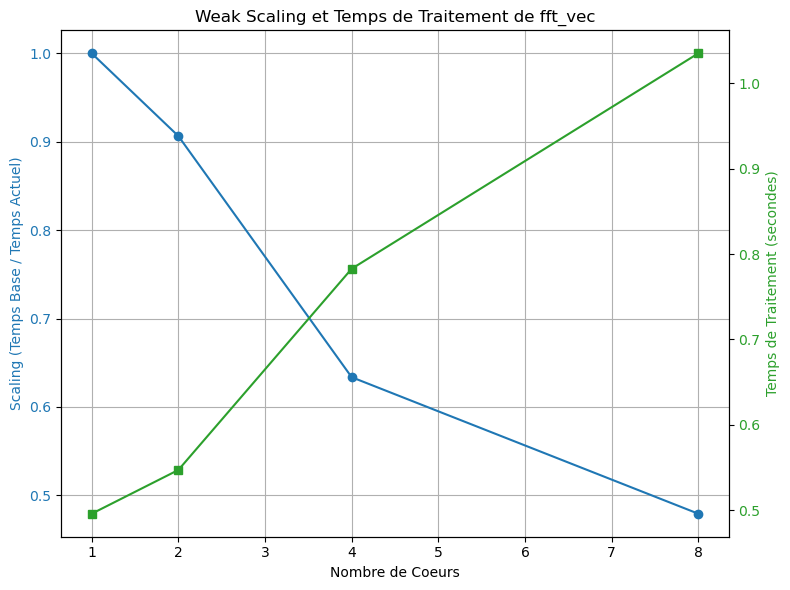

In [35]:
import matplotlib.pyplot as plt
# Weak scaling du fft_vec SUR PC 

# Exemple de données pour le weak scaling
tailles_taches = [1048576, 2097152, 4194304, 8388608]  # Taille de la tâche
nombre_coeurs = [1, 2, 4, 8]  # Nombre de coeurs utilisés
temps_traitement = [0.496051, 0.547263,0.782791,1.03497]  # Temps de traitement en secondes

# Calcul de l'efficacité du scaling
efficacite_scaling = [temps_traitement[0] / t for t in temps_traitement]

# Création d'un graphique avec deux échelles pour mieux visualiser l'efficacité et le temps de traitement

fig, ax1 = plt.subplots(figsize=(8, 6))

# Configuration de l'axe pour l'efficacité du scaling
color = 'tab:blue'
ax1.set_xlabel('Nombre de Coeurs')
ax1.set_ylabel('Scaling (Temps Base / Temps Actuel)', color=color)
ax1.plot(nombre_coeurs, efficacite_scaling, 'o-', color=color, label='Efficacité du Weak Scaling - fft_vec')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# Création d'un deuxième axe pour le temps de traitement
ax2 = ax1.twinx()  # Axe partageant le même axe x
color = 'tab:green'
ax2.set_ylabel('Temps de Traitement (secondes)', color=color)
ax2.plot(nombre_coeurs, temps_traitement, 's-', color=color, label='Temps de Traitement - fft_vec')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et configuration générale du graphique
plt.title('Weak Scaling et Temps de Traitement de fft_vec')
fig.tight_layout()

# Affichage du graphique
plt.show()


# NEON


In [36]:
# Temps d'exécution pour le code séquentiel
sequential_times = np.array([43.8751, 43.5364, 44.5305, 43.7236, 44.7507])

# Temps d'exécution moyen pour le code parallèle (OpenMP)
parallel_times = np.array([
    [25.4741, 25.2593, 25.3023, 25.2306, 25.5186],
    [15.59, 16.9254, 17.0641, 16.4292, 15.492],
    [13.7739, 13.8273, 13.4167, 13.7599, 13.539],
    [12.235, 12.3627, 11.8413, 12.3614, 12.1788]
])

# Temps d'exécution moyen pour le code vectoriel (OpenMP + Vectorisation)
vectorized_times = np.array([
    [11.3252, 11.4486, 11.634, 11.8303, 12.115],
    [7.23742, 6.65796, 6.68159, 6.62647, 7.38985],
    [5.9296, 6.18888, 6.21226, 6.17818, 6.69038],
    [5.58857, 5.73661, 6.40529, 5.77768, 6.24624]
])

# Calculer les moyennes pour chaque configuration
avg_sequential = np.mean(sequential_times)
avg_parallel = np.mean(parallel_times, axis=1)
avg_vectorized = np.mean(vectorized_times, axis=1)

# Calculer les accélérations
speedup_parallel = avg_sequential / avg_parallel
speedup_vectorized = avg_sequential / avg_vectorized

# Configuration des threads
threads = np.array([2, 4, 6, 8])

# Calculer les efficacités pour chaque configuration
efficiency_parallel = speedup_parallel / threads
efficiency_vectorized = speedup_vectorized / threads

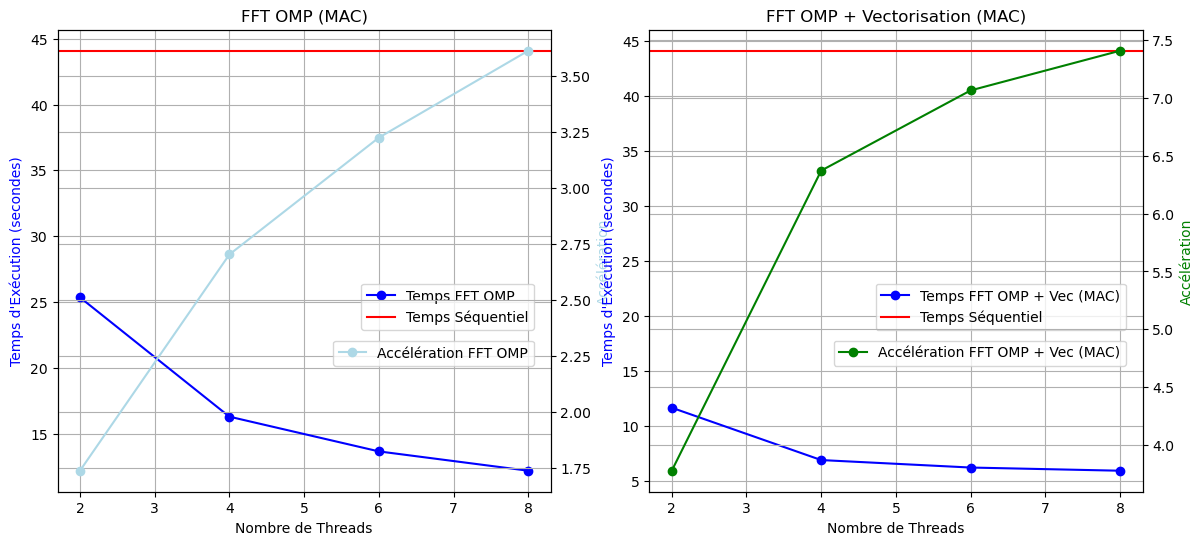

In [37]:
# Création du graphique avec 3 subplots pour FFT OMP, FFT OMP + Vectorisation, et FFT NEON/AVX Vectorisation
plt.figure(figsize=(14, 6))

# FFT OMP
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(threads, avg_parallel, label="Temps FFT OMP", marker='o', color='blue')
plt.axhline(y=avg_sequential, color='r', linestyle='-', label="Temps Séquentiel")
plt.xlabel("Nombre de Threads")
plt.ylabel("Temps d'Exécution (secondes)", color='blue')
plt.title("FFT OMP (MAC)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.twinx()
plt.plot(threads, speedup_parallel, label="Accélération FFT OMP", marker='o', color='lightblue')  # Changer la couleur à lightblue
plt.ylabel("Accélération", color='lightblue')  # Changer la couleur à lightblue
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.3))  # Ajuster les coordonnées de la légende
plt.grid(True)

# FFT OMP + Vectorisation
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(threads, avg_vectorized, label="Temps FFT OMP + Vec (MAC)", marker='o', color='blue')
plt.axhline(y=avg_sequential, color='r', linestyle='-', label="Temps Séquentiel")
plt.xlabel("Nombre de Threads")
plt.ylabel("Temps d'Exécution (secondes)", color='blue')
plt.title("FFT OMP + Vectorisation (MAC)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.twinx()
plt.plot(threads, speedup_vectorized, label="Accélération FFT OMP + Vec (MAC)", marker='o', color='green')
plt.ylabel("Accélération", color='green')
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.3))  # Ajuster les coordonnées de la légende
plt.grid(True)



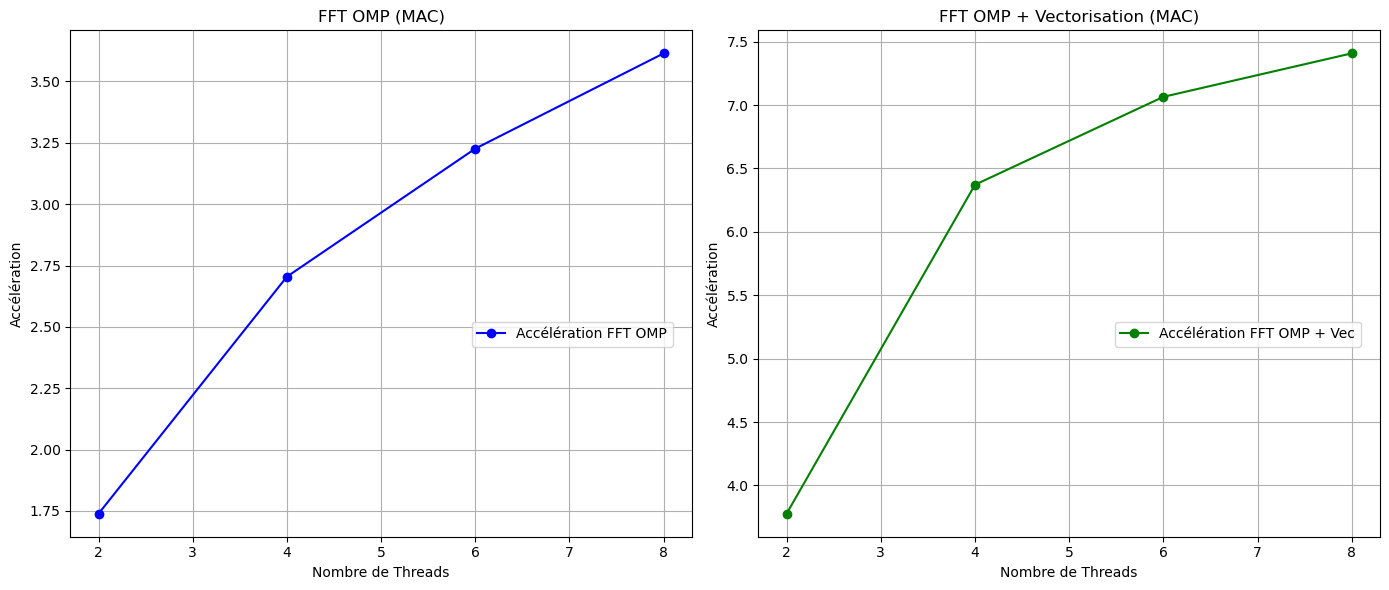

In [38]:
# Création du graphique avec 3 subplots pour FFT OMP, FFT OMP + Vectorisation, et FFT NEON/AVX Vectorisation
plt.figure(figsize=(14, 6))

# FFT OMP
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(threads, speedup_parallel, label="Accélération FFT OMP", marker='o', color='blue')
plt.xlabel("Nombre de Threads")
plt.ylabel("Accélération")
plt.title("FFT OMP (MAC)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.grid(True)

# FFT OMP + Vectorisation
plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(threads, speedup_vectorized, label="Accélération FFT OMP + Vec", marker='o', color='green')
plt.xlabel("Nombre de Threads")
plt.ylabel("Accélération")
plt.title("FFT OMP + Vectorisation (MAC)")
plt.legend(loc='center right', bbox_to_anchor=(0.98, 0.4))  # Ajuster les coordonnées de la légende
plt.grid(True)

plt.tight_layout()
plt.show()


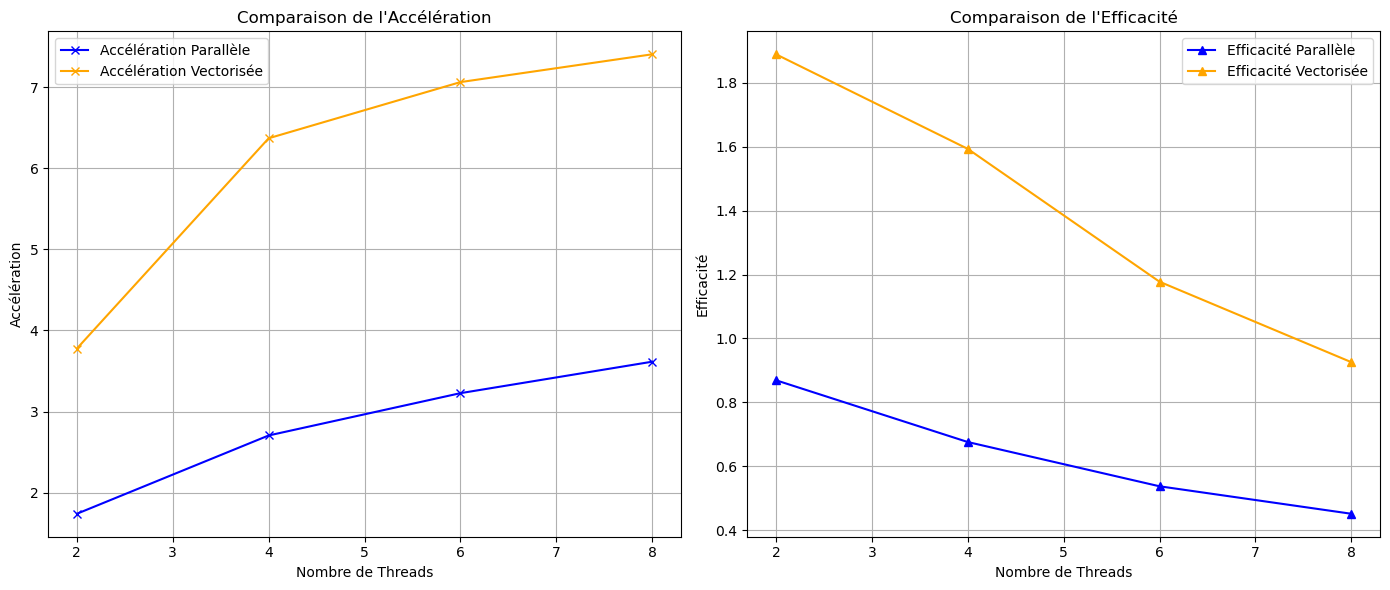

In [39]:
# Création des graphiques
plt.figure(figsize=(14, 6))

# Comparaison de l'accélération
plt.subplot(1, 2, 1)
plt.plot(threads, speedup_parallel, marker='x', color='blue', linestyle='-', label='Accélération Parallèle')
plt.plot(threads, speedup_vectorized, marker='x', color='orange', linestyle='-', label='Accélération Vectorisée')
plt.title('Comparaison de l\'Accélération')
plt.xlabel('Nombre de Threads')
plt.ylabel('Accélération')
plt.legend()
plt.grid(True)

# Comparaison de l'efficacité
plt.subplot(1, 2, 2)
plt.plot(threads, efficiency_parallel, marker='^', color='blue', linestyle='-', label='Efficacité Parallèle')
plt.plot(threads, efficiency_vectorized, marker='^', color='orange', linestyle='-', label='Efficacité Vectorisée')
plt.title('Comparaison de l\'Efficacité')
plt.xlabel('Nombre de Threads')
plt.ylabel('Efficacité')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

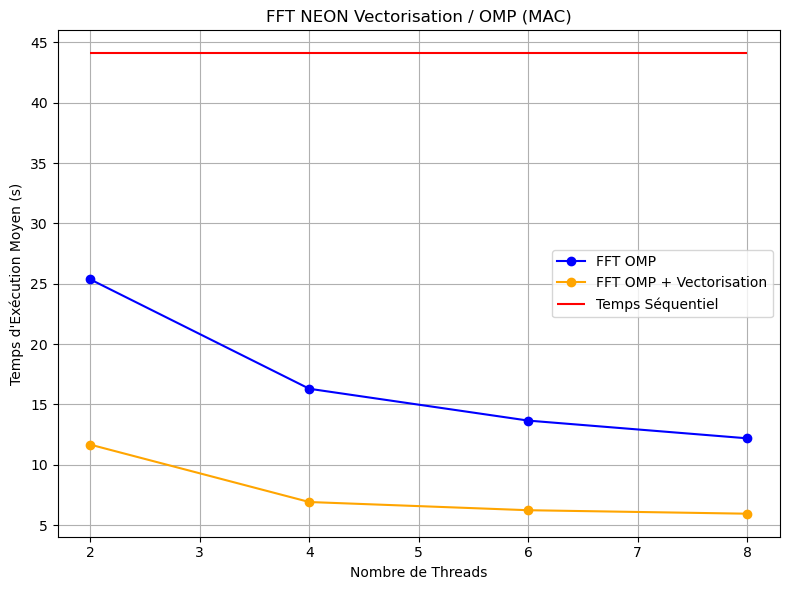

In [40]:
# Création des graphiques
plt.figure(figsize=(8, 6))

# FFT NEON/AVX Vectorisation
plt.subplot(1, 1, 1)
plt.plot(threads, avg_parallel, marker='o', color='blue', linestyle='-', label='FFT OMP')
plt.plot(threads, avg_vectorized, marker='o', color='orange', linestyle='-', label='FFT OMP + Vectorisation')
plt.hlines(avg_sequential, threads[0], threads[-1], colors='red', linestyles='-', label='Temps Séquentiel')
plt.title('FFT NEON Vectorisation / OMP (MAC)')
plt.xlabel('Nombre de Threads')
plt.ylabel('Temps d\'Exécution Moyen (s)')
plt.legend(loc='center right')
plt.grid(True)

plt.tight_layout()
plt.show()

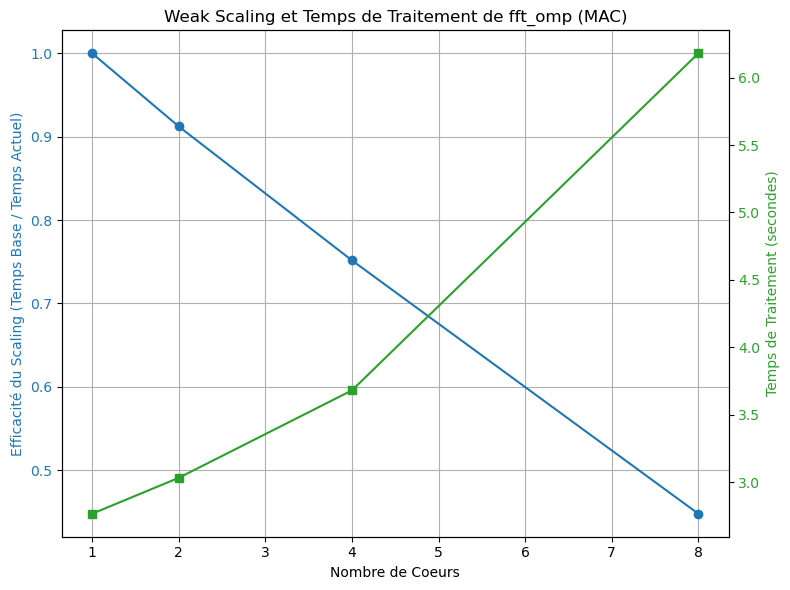

In [41]:
# Weak scaling du fft_omp SUR MAC 

# Exemple de données pour le weak scaling
tailles_taches = [4194304, 8388608, 16777216, 33554432]  # Taille de la tâche
nombre_coeurs = [1, 2, 4, 8]  # Nombre de coeurs utilisés
temps_traitement = [2.76698, 3.03307,3.68122,6.17943]  # Temps de traitement en secondes

# Calcul de l'efficacité du scaling
efficacite_scaling = [temps_traitement[0] / t for t in temps_traitement]


fig, ax1 = plt.subplots(figsize=(8, 6))

# Configuration de l'axe pour l'efficacité du scaling
color = 'tab:blue'
ax1.set_xlabel('Nombre de Coeurs')
ax1.set_ylabel('Efficacité du Scaling (Temps Base / Temps Actuel)', color=color)
ax1.plot(nombre_coeurs, efficacite_scaling, 'o-', color=color, label='Efficacité du Weak Scaling - fft_omp (MAC)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# Création d'un deuxième axe pour le temps de traitement
ax2 = ax1.twinx()  # Axe partageant le même axe x
color = 'tab:green'
ax2.set_ylabel('Temps de Traitement (secondes)', color=color)
ax2.plot(nombre_coeurs, temps_traitement, 's-', color=color, label='Temps de Traitement - fft_omp (MAC)')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et configuration générale du graphique
plt.title('Weak Scaling et Temps de Traitement de fft_omp (MAC)')
fig.tight_layout()

# Affichage du graphique
plt.show()


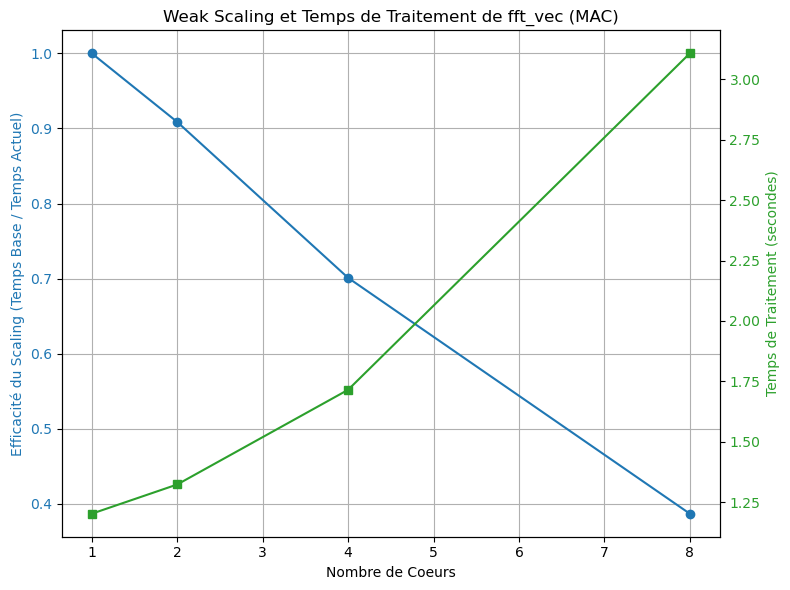

In [42]:
import matplotlib.pyplot as plt
# Weak scaling du fft_NEON_AVX_vec SUR MAC 

# Exemple de données pour le weak scaling
tailles_taches = [4194304, 8388608, 16777216, 33554432]  # Taille de la tâche
nombre_coeurs = [1, 2, 4, 8]  # Nombre de coeurs utilisés
temps_traitement = [1.20245, 1.32338,1.71519,3.10736]  # Temps de traitement en secondes

# Calcul de l'efficacité du scaling
efficacite_scaling = [temps_traitement[0] / t for t in temps_traitement]

fig, ax1 = plt.subplots(figsize=(8, 6))
# Configuration de l'axe pour l'efficacité du scaling
color = 'tab:blue'
ax1.set_xlabel('Nombre de Coeurs')
ax1.set_ylabel('Efficacité du Scaling (Temps Base / Temps Actuel)', color=color)
ax1.plot(nombre_coeurs, efficacite_scaling, 'o-', color=color, label='Efficacité du Weak Scaling - fft_vec (MAC)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# Création d'un deuxième axe pour le temps de traitement
ax2 = ax1.twinx()  # Axe partageant le même axe x
color = 'tab:green'
ax2.set_ylabel('Temps de Traitement (secondes)', color=color)
ax2.plot(nombre_coeurs, temps_traitement, 's-', color=color, label='Temps de Traitement - fft_vec (MAC)')
ax2.tick_params(axis='y', labelcolor=color)

# Titre et configuration générale du graphique
plt.title('Weak Scaling et Temps de Traitement de fft_vec (MAC)')
fig.tight_layout()

# Affichage du graphique
plt.show()